# Similarity Measure

### Introduction
The similarity measure is the measure of how much alike two data objects are. The similarity is highly dependent on the domain and application. 

### Why we need similarity and dissimilarity
If we can measure similarity and dissimilarity, then
+ we can distinguish one object from another
+ we can group them based on similarity and dissimilarity (for example k-means clustering)
+ we can classify a new object into the group

### Euclidean Distance
When data is dense or continuous, this is the best proximity measure. The Euclidean distance between two points is the length of the path connecting them.This distance between two points is given by the Pythagorean theorem. The Euclidean distance can be measured as following:

$$d(x,y) = \sqrt{\sum_{k=1}^{n}(x_k-y_k)^2} $$

where
+ $n$ is the number of dimensions (attributes)
+ $x_k$ and $y_k$ are respectively the $k^{th}$ attributes

### Classification using Euclidean Distance

#### Data
Let say that you did an experiment where you collect a species of fish and measures its weight, length and label it young, mid or adult. Below is the dataset.

In [26]:
import numpy as np

X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.3, 1],
              [1.3, 2.7, 0],
              [2.4, 3.1, 0],
              [6.6, 6.1, 1],
              [6.6, 6.4, 1],
              [6.3, 5.8, 1],
              [9.6, 9.8, 2],
              [8.9, 8.9, 2],
              [8.7, 9.9, 2],
              [2.4, 3.8, 0],
              [2.0, 3.2, 0],
              [1.3, 1.7, 0]])
X

array([[6.6, 6.2, 1. ],
       [9.7, 9.9, 2. ],
       [8. , 8.3, 2. ],
       [6.3, 5.3, 1. ],
       [1.3, 2.7, 0. ],
       [2.4, 3.1, 0. ],
       [6.6, 6.1, 1. ],
       [6.6, 6.4, 1. ],
       [6.3, 5.8, 1. ],
       [9.6, 9.8, 2. ],
       [8.9, 8.9, 2. ],
       [8.7, 9.9, 2. ],
       [2.4, 3.8, 0. ],
       [2. , 3.2, 0. ],
       [1.3, 1.7, 0. ]])

#### Preparing the data

In [27]:
import pandas as pd

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.3,1.0
4,1.3,2.7,0.0
5,2.4,3.1,0.0
6,6.6,6.1,1.0
7,6.6,6.4,1.0
8,6.3,5.8,1.0
9,9.6,9.8,2.0


Now the data can be plotted to visualize the three different groups. They are subsetted by their label, assigned a different colour and label, and by repeating this they form different layers in the scatter plot.

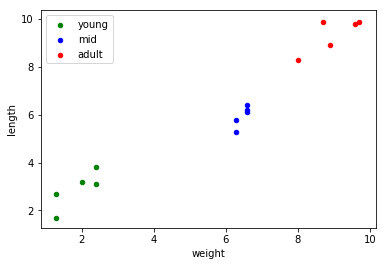

In [28]:
%matplotlib inline
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='green', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='blue', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)

#### Classifying
Considering instance #0, #1, and #4 to be our known instances, we assume that we don’t know the label of #14. Plotting this will look as follows:

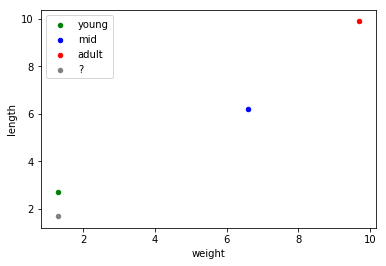

In [29]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='green', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='blue', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)

Based on this visualization you can easily group the grey data with the green data. But lets check using Euclidean distance.

#### Classfying using Euclidian

In [30]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]

data = [x0, x1, x4, x14]
df = pd.DataFrame(data,index = ["x0", "x1", "x4", "x14"] ,columns=['x','y'])
display(df)

,x,y
x0,6.6,6.2
x1,9.7,9.9
x4,1.3,2.7
x14,1.3,1.7


Lets find Euclidean distance for each of them with respective to instance #14

In [32]:
#function to calculate Euclidean Distance
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

data1 = [euclidean_distance(x14, x0), euclidean_distance(x14, x1), euclidean_distance(x14, x4)]
df1 = pd.DataFrame(data1,index = ["(x14, x0)", "(x14, x1)", "(x14, x4)"] ,columns=['Euclidean Distance'])
display(df1)

,Euclidean Distance
"(x14, x0)",6.952697
"(x14, x1)",11.738824
"(x14, x4)",1.000000


According to euclidean distance, instance #14 is closest to #4. The 4th instance had the label:

In [33]:
X[4]

array([1.3, 2.7, 0. ])

For more detailed information, this will a great book to refer to: Introduction to Data Mining (Second Edition), By (author)  Pang-Ning Tan ,Michael Steinbach ,Anuj Karpatne ,Vipin Kumar